---
title: "Supervised Learning"
format:
    html: 
        code-fold: false
---

<!-- After digesting the instructions, you can delete this cell, these are assignment instructions and do not need to be included in your final submission.  -->

{{< include instructions.qmd >}} 

# Code 

For the regression part, we choose Popularity value from Spotify as the target and other numeral values from Youtube and Spotify as features for model buidling.

And after comparing several regression models, we discover that Support Vector Regression has the best performance. 

Besides, to determine the importance rank for each feature, we take permutation_importance function and get the permutated score for ecah feature.

In [3]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('../../data/processed-data/Normalized_Data_with_Sentiments.csv')


# Specify the feature columns
features = [
    'Days Since Published', 'View Count', 'Like Count', 'Comment Count',
    'Subscriber Count', 'Definition', 'Mean Sentiment Score',
    'Duration_seconds', 'genre_label', 'singer_followers', 'singer_popularity'
]

# Ensure the target column 'popularity' exists in DataFrame
if 'Popularity' not in df.columns:
    raise ValueError("The 'popularity' column is missing from the DataFrame.")

# Split into input (X) and target (y)
X = df[features]  # Inputs
y = df['Popularity']  # Target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming the SVR model is already trained as `svr_model`
svr_model = SVR(kernel='rbf', C=100, gamma='auto')
svr_model.fit(X_train, y_train)

# Predict on the testing data
y_pred = svr_model.predict(X_test)
# Calculate mean squared error and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}, R^2 Score: {r2}")

# Perform permutation importance
perm_importance = permutation_importance(svr_model, X_test, y_test, n_repeats=30, random_state=42)

# Get importance scores
importance_scores = perm_importance.importances_mean

# Print feature importance
print("Feature importances:")
for i, feature in enumerate(features):
    print(f"{feature}: {importance_scores[i]}")


Mean Squared Error: 99.74699515216321, R^2 Score: 0.5685464639259524
Feature importances:
Days Since Published: 0.1459005103042238
View Count: 0.0689113148502243
Like Count: 0.06300639647560942
Comment Count: 0.004829835437846308
Subscriber Count: 0.15936065653760553
Definition: 0.05992188839233135
Mean Sentiment Score: 0.037774091955604674
Duration_seconds: 0.0011028667361578036
genre_label: 0.15819782979164201
singer_followers: 0.0360773423716888
singer_popularity: 0.6712934520249385


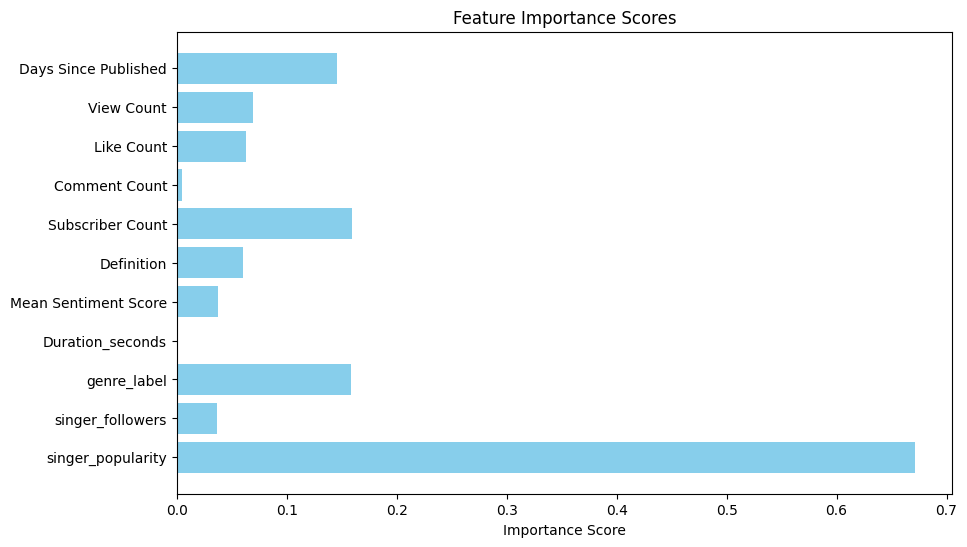

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(features, importance_scores, color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance Scores')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest score on top
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# Split into input (X) and target (y)
X = df[features]  # Inputs
y = df['Popularity']  # Target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
linear_model = LinearRegression()
ridge_model = Ridge(alpha=100)  # Alpha is the regularization strength
lasso_model = Lasso(alpha=0.1)  # Alpha can be adjusted based on the scale of features

# Train the models
linear_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

# Predict using the test dataset
y_pred_linear = linear_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)

# Calculate regression model metrics
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Print results
print(f"Linear Regression - Mean Squared Error: {mse_linear}, R^2 Score: {r2_linear}")
print(f"Ridge Regression - Mean Squared Error: {mse_ridge}, R^2 Score: {r2_ridge}")
print(f"Lasso Regression - Mean Squared Error: {mse_lasso}, R^2 Score: {r2_lasso}")

Linear Regression - Mean Squared Error: 123.52107678768424, R^2 Score: 0.4657121722973071
Ridge Regression - Mean Squared Error: 125.618404698663, R^2 Score: 0.4566402243943335
Lasso Regression - Mean Squared Error: 124.26131518891665, R^2 Score: 0.46251028661381044


We tried using PCA to reduce dimensions, but it doesn't seem to work very well.

In [6]:
from sklearn.decomposition import PCA
# Applying PCA
pca = PCA(n_components=3)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X)

# How much variance was retained?
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Variance Explained:", sum(pca.explained_variance_ratio_))

Explained Variance Ratio: [0.35411601 0.1606999  0.12194563]
Total Variance Explained: 0.636761534701488


For the binary classifacation, we try to determine whether the song is popular with supervised learning using Popularity as target and other kinds of values as features. It begins by visualizing the 'Popularity' data, sets a threshold for popularity based on the 80th percentile, and balances the dataset using under-sampling. Finally we apply a RandomForestClassifier to predict whether songs are popular.

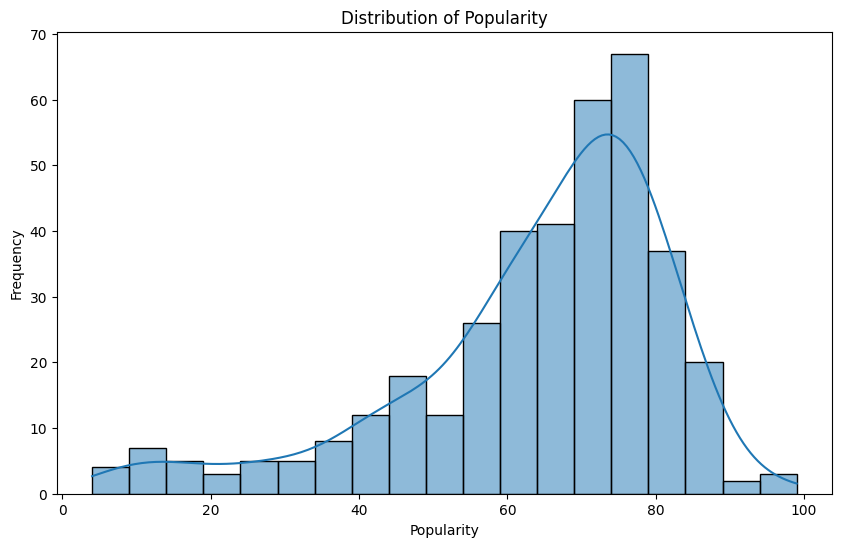

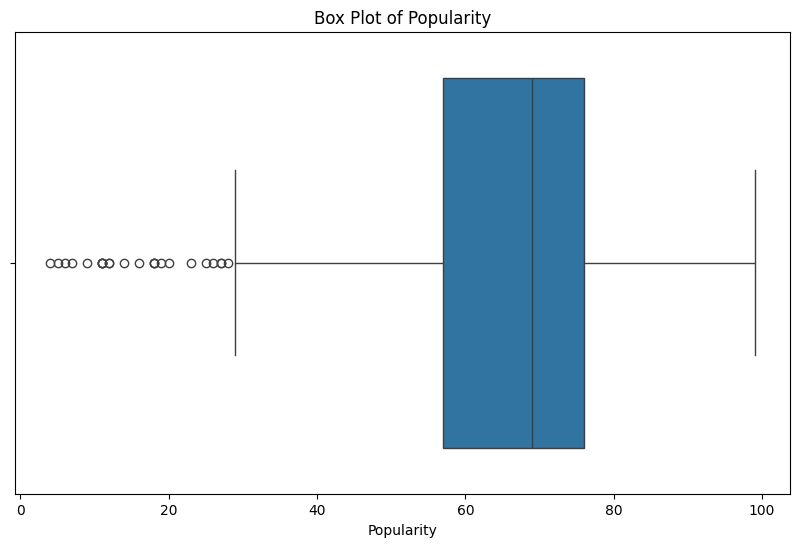

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# histplot build
plt.figure(figsize=(10, 6))
sns.histplot(df['Popularity'], kde=True)
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

# boxplot build
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Popularity'])
plt.title('Box Plot of Popularity')
plt.xlabel('Popularity')
plt.show()

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler  # Ensure to import the necessary module for under-sampling

# Assume df is your DataFrame
# Set the threshold for songs to be considered popular
popularity_threshold = df['Popularity'].quantile(0.8)
df['is_popular'] = df['Popularity'] > popularity_threshold

# Define features and target variable
features = [
    'Days Since Published', 'View Count', 'Like Count', 'Comment Count',
    'Subscriber Count', 'Definition', 'Mean Sentiment Score',
    'Duration_seconds', 'genre_label', 'singer_followers', 'singer_popularity'
]
X = df[features]
y = df['is_popular']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the random under-sampler
rus = RandomUnderSampler(random_state=5100)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Define the parameter grid to be tested
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4, 5]
}

# Create an instance of RandomForestClassifier
rf = RandomForestClassifier(random_state=5100)

# Create an instance of GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=0)

# Perform the grid search
grid_search.fit(X_resampled, y_resampled)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Use the best parameters model to make predictions
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Output the classification report
print(classification_report(y_test, y_pred))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


Best parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best score: 0.8355742296918768
              precision    recall  f1-score   support

       False       0.92      0.72      0.81        65
        True       0.25      0.60      0.35        10

    accuracy                           0.71        75
   macro avg       0.59      0.66      0.58        75
weighted avg       0.83      0.71      0.75        75



In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.under_sampling import RandomUnderSampler  # Import the random under-sampling class

# Set the threshold for a song to be considered popular
popularity_threshold = df['Popularity'].quantile(0.8)
df['is_popular'] = df['Popularity'] > popularity_threshold

# Define the features and target variable
features = [
    'Days Since Published', 'View Count', 'Like Count', 'Comment Count',
    'Subscriber Count', 'Definition', 'Mean Sentiment Score',
    'Duration_seconds', 'genre_label', 'singer_followers', 'singer_popularity'
]
X = df[features]
y = df['is_popular']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the random under-sampler
rus = RandomUnderSampler(random_state=5100)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Create and train the Random Forest model
model = RandomForestClassifier(random_state=5100, min_samples_leaf=4, min_samples_split=10, n_estimators=100, max_depth=None)
model.fit(X_resampled, y_resampled)
# model.fit(X_train, y_train)

# Make predictions using the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.7066666666666667
Confusion Matrix:
 [[47 18]
 [ 4  6]]
Classification Report:
               precision    recall  f1-score   support

       False       0.92      0.72      0.81        65
        True       0.25      0.60      0.35        10

    accuracy                           0.71        75
   macro avg       0.59      0.66      0.58        75
weighted avg       0.83      0.71      0.75        75



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [10]:
from sklearn.linear_model import LogisticRegression

# Create and train the Logistic Regression model
lr_model = LogisticRegression(random_state=5100, max_iter=1000)  # Increase max_iter if convergence issues occur
lr_model.fit(X_resampled, y_resampled)

# Make predictions using the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Logistic Regression Model Evaluation")
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Logistic Regression Model Evaluation
Accuracy: 0.7733333333333333
Confusion Matrix:
 [[50 15]
 [ 2  8]]
Classification Report:
               precision    recall  f1-score   support

       False       0.96      0.77      0.85        65
        True       0.35      0.80      0.48        10

    accuracy                           0.77        75
   macro avg       0.65      0.78      0.67        75
weighted avg       0.88      0.77      0.81        75



In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler

# Load your data and preprocess as before
# Assume X and y are already defined

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply random under-sampling
rus = RandomUnderSampler(random_state=5100)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001, 0.0001],  # Kernel coefficient
    'degree': [2, 3, 4],  # Degree of the polynomial kernel function
    'coef0': [0.0, 0.5, 1]  # Independent term in kernel function for poly/sigmoid
}

# Create a dictionary to hold grids for different kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {}

for kernel in kernels:
    # Update the parameter grid based on the kernel
    grid_params = {k: v for k, v in param_grid.items() if k in ['C', 'gamma'] or (kernel in ['poly', 'sigmoid'] and k in ['degree', 'coef0'])}
    
    # Initialize the classifier and GridSearchCV
    svm_model = SVC(kernel=kernel, random_state=5100)
    grid_search = GridSearchCV(svm_model, grid_params, cv=3, scoring='accuracy', verbose=0, n_jobs=-1)
    
    # Fit GridSearchCV
    grid_search.fit(X_resampled, y_resampled)
    
    # Best model
    best_model = grid_search.best_estimator_
    
    # Predictions and evaluation
    y_pred = best_model.predict(X_test)
    print(f"Best parameters for {kernel}: {grid_search.best_params_}")
    print(classification_report(y_test, y_pred))
    
    # Store results
    results[kernel] = {
        'best_params': grid_search.best_params_,
        'classification_report': classification_report(y_test, y_pred, output_dict=True)
    }

Best parameters for linear: {'C': 0.1, 'gamma': 'scale'}
              precision    recall  f1-score   support

       False       0.94      0.77      0.85        65
        True       0.32      0.70      0.44        10

    accuracy                           0.76        75
   macro avg       0.63      0.73      0.64        75
weighted avg       0.86      0.76      0.79        75



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


Best parameters for poly: {'C': 0.1, 'coef0': 1, 'degree': 2, 'gamma': 0.1}
              precision    recall  f1-score   support

       False       0.91      0.82      0.86        65
        True       0.29      0.50      0.37        10

    accuracy                           0.77        75
   macro avg       0.60      0.66      0.62        75
weighted avg       0.83      0.77      0.80        75

Best parameters for rbf: {'C': 1, 'gamma': 0.01}
              precision    recall  f1-score   support

       False       0.93      0.77      0.84        65
        True       0.29      0.60      0.39        10

    accuracy                           0.75        75
   macro avg       0.61      0.68      0.61        75
weighted avg       0.84      0.75      0.78        75

Best parameters for sigmoid: {'C': 0.1, 'coef0': 0.0, 'degree': 2, 'gamma': 'scale'}
              precision    recall  f1-score   support

       False       0.91      0.78      0.84        65
        True       0.26    

We performs genre classification of songs using a RandomForestClassifier. It starts by defining features related to song metrics, splits the data into training and testing sets, and optionally scales the features. The RandomForest model is then trained and evaluated on its ability to predict song genres, with performance metrics reported for accuracy and classification detail. This process illustrates a typical machine learning workflow from data preparation to model evaluation.

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler  # Ensure to import the necessary module for under-sampling
df = pd.read_csv('../../data/processed-data/Updated_Data_with_Sentiments.csv')

# Define features and target
features = [
    'Days Since Published', 'View Count', 'Like Count', 'Comment Count',
    'Subscriber Count', 'Definition', 'Mean Sentiment Score',
    'Duration_seconds', 'singer_followers', 'singer_popularity', 'Popularity'
]
X = df[features]
y = df['genre']  # This should be your target variable for genre classification

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the random under-sampler
# rus = RandomUnderSampler(random_state=5100)
# X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Define the parameter grid to be tested
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 3, 4, 5],
    'min_samples_split': list(range(4, 11)),  
    'min_samples_leaf': list(range(3, 11))    
}

# Create an instance of RandomForestClassifier
rf = RandomForestClassifier(random_state=5100)

# Create an instance of GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=0)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Use the best parameters model to make predictions
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Output the classification report
print(classification_report(y_test, y_pred))

Best parameters: {'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 200}
Best score: 0.7433333333333333
              precision    recall  f1-score   support

  electronic       1.00      0.91      0.95        11
     hip-pop       1.00      0.71      0.83        17
        jazz       0.91      1.00      0.95        10
         pop       0.60      0.64      0.62        14
        rock       0.78      0.91      0.84        23

    accuracy                           0.83        75
   macro avg       0.86      0.83      0.84        75
weighted avg       0.85      0.83      0.83        75



In [13]:
from sklearn.preprocessing import StandardScaler

# Define features and target
features = [
    'Days Since Published', 'View Count', 'Like Count', 'Comment Count',
    'Subscriber Count', 'Definition', 'Mean Sentiment Score',
    'Duration_seconds', 'singer_followers', 'singer_popularity', 'Popularity'
]
X = df[features]
y = df['genre']  # This should be your target variable for genre classification
# print(X.head())

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Initialize the RandomForestClassifier
model = RandomForestClassifier(n_estimators=200, random_state=42, min_samples_leaf=3, min_samples_split=4)

# Train the model
# model.fit(X_train_scaled, y_train)

# Make predictions
# y_pred = model.predict(X_test_scaled)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

  electronic       1.00      0.91      0.95        11
     hip-pop       1.00      0.71      0.83        17
        jazz       0.83      1.00      0.91        10
         pop       0.62      0.71      0.67        14
        rock       0.84      0.91      0.88        23

    accuracy                           0.84        75
   macro avg       0.86      0.85      0.85        75
weighted avg       0.86      0.84      0.84        75

Accuracy: 0.84


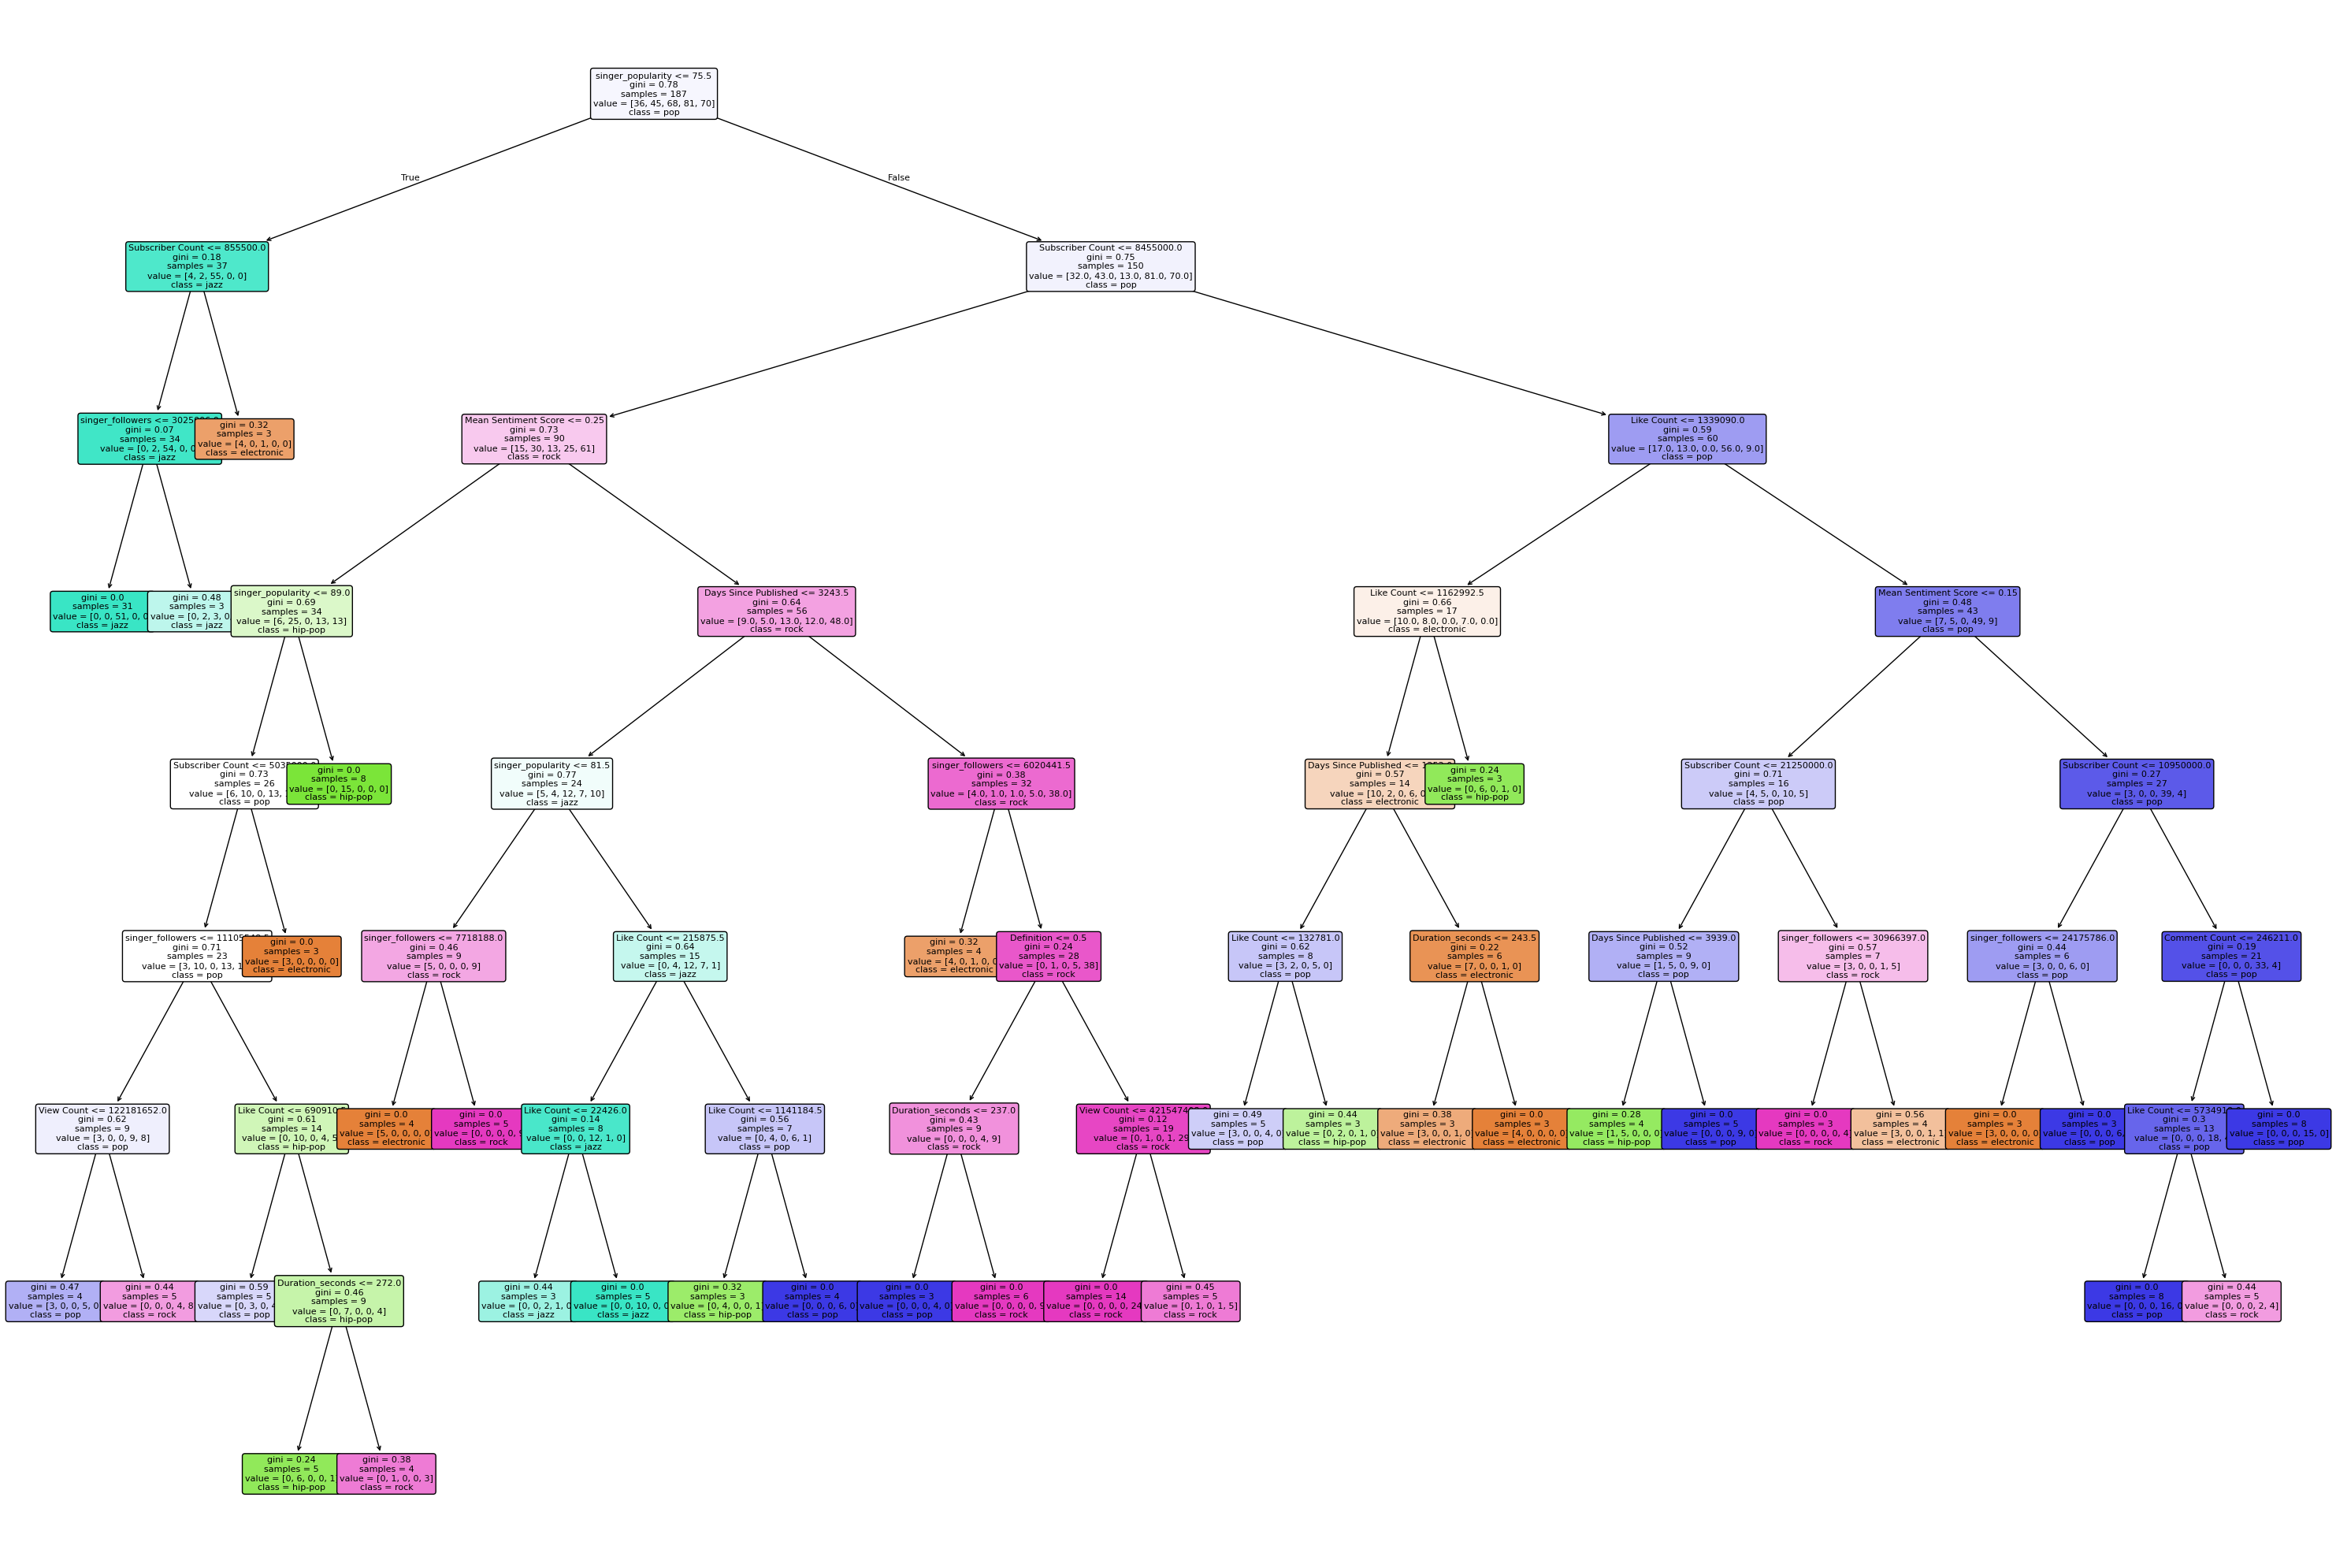

In [14]:
import matplotlib.pyplot as plt
from sklearn import tree
import matplotlib

# Assuming 'model' is your trained RandomForestClassifier and you are visualizing its first tree
first_tree = model.estimators_[0]

# Set the size of the plot and DPI for higher resolution
plt.figure(figsize=(30, 20), dpi=100)  # You can adjust this as needed

# Plot the first tree with custom font size and node size
decision_tree_plot = tree.plot_tree(
    first_tree,
    feature_names=features,  # Make sure 'features' matches the actual features used in your model
    class_names=model.classes_,  # Ensure the class names are correct
    filled=True,
    rounded=True,
    fontsize=8,  # Adjust font size here
    node_ids=False,
    proportion=False,
    precision=2
)

# Manually adjust the positions of nodes and text to prevent overlap if needed
for o in decision_tree_plot:
    # Each object in the list represents a node or text
    # Example: Adjusting only nodes might look like this
    if isinstance(o, matplotlib.text.Text):
        pass  # you can adjust text properties here
    elif isinstance(o, matplotlib.patches.Patch):
        o.set_width(o.get_width() * 1.5)  # Increase the width of the node

# Adjust layout to make more space available
plt.tight_layout()

# Show the plot
plt.show()

In [15]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Instantiate the random under-sampler
# rus = RandomUnderSampler(random_state=5100)
# X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Define the parameter grid to be tested
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 3, 4, 5],
    'min_samples_split': list(range(4, 11)),  
    'min_samples_leaf': list(range(3, 11))    
}

# Create an instance of RandomForestClassifier
rf = RandomForestClassifier(random_state=5100)

# Create an instance of GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=0)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Use the best parameters model to make predictions
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Output the classification report
print(classification_report(y_test, y_pred))

Best parameters: {'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 200}
Best score: 0.7433333333333333
              precision    recall  f1-score   support

  electronic       1.00      0.91      0.95        11
     hip-pop       1.00      0.71      0.83        17
        jazz       0.91      1.00      0.95        10
         pop       0.60      0.64      0.62        14
        rock       0.78      0.91      0.84        23

    accuracy                           0.83        75
   macro avg       0.86      0.83      0.84        75
weighted avg       0.85      0.83      0.83        75



In [16]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(solver='lbfgs', random_state=42, max_iter=1000, multi_class='ovr')

# Train the model
log_reg_model.fit(X_train, y_train)

# Make predictions
y_pred = log_reg_model.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

  electronic       0.75      0.82      0.78        11
     hip-pop       0.45      0.29      0.36        17
        jazz       0.90      0.90      0.90        10
         pop       0.40      0.43      0.41        14
        rock       0.59      0.70      0.64        23

    accuracy                           0.60        75
   macro avg       0.62      0.63      0.62        75
weighted avg       0.59      0.60      0.59        75

Accuracy: 0.6


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Binary classification used to determine whether the sentiment analysis for the mv will  be neural/negative or postive.

In [17]:
def classify_sentiment(score):
    if score <= 0.2:
        return 'neural/negative'
    else:
        return 'positive'

# Assume df is your DataFrame and contains a column named 'SentimentScore'
df['Sentiment_class'] = df['Mean Sentiment Score'].apply(classify_sentiment)

# Define features and target variable
features = [
    'Days Since Published', 'View Count', 'Like Count', 'Comment Count',
    'Subscriber Count', 'Definition', 'genre_label',
    'Duration_seconds', 'singer_followers', 'singer_popularity', 'Popularity'
]
X = df[features]
y = df['Sentiment_class']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5100)

# Perform the grid search
# grid_search.fit(X_resampled, y_resampled)

model = RandomForestClassifier(n_estimators=50, random_state=5000, min_samples_leaf=3, min_samples_split=7)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5733333333333334
Confusion Matrix:
 [[ 6 28]
 [ 4 37]]
Classification Report:
                  precision    recall  f1-score   support

neural/negative       0.60      0.18      0.27        34
       positive       0.57      0.90      0.70        41

       accuracy                           0.57        75
      macro avg       0.58      0.54      0.49        75
   weighted avg       0.58      0.57      0.51        75



For the multi-class classification method, we predicted the interaction level of a song based on like_ratio, and the target variable was Like Ratio Category, which categorized the interaction level into three categories: Low, Medium, and High. First, like_ratio was transformed into these three categories by setting thresholds, and data cleaning was performed to remove missing values. To cope with the category imbalance problem, we used the SMOTE technique to oversample the training set. Then, we applied Logistic Regression, Decision Tree and Random Forest classification models for training and evaluated the performance of the models through cross-validation. For the Decision Tree model, we also performed hyper-parameter tuning to further optimize the model results.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
file_path =  '../../data/processed-data//Normalized_Data_with _like_comment_ratio.csv'
df = pd.read_csv(file_path)
print('-------like ratio---------')
print(df['like_ratio'].describe())

-------like ratio---------
count    375.000000
mean       1.187740
std        1.201180
min        0.000000
25%        0.557778
50%        0.787268
75%        1.402276
max       12.401685
Name: like_ratio, dtype: float64


Then is the visualization of the distribution of like_ratio, helping us better understand the data.

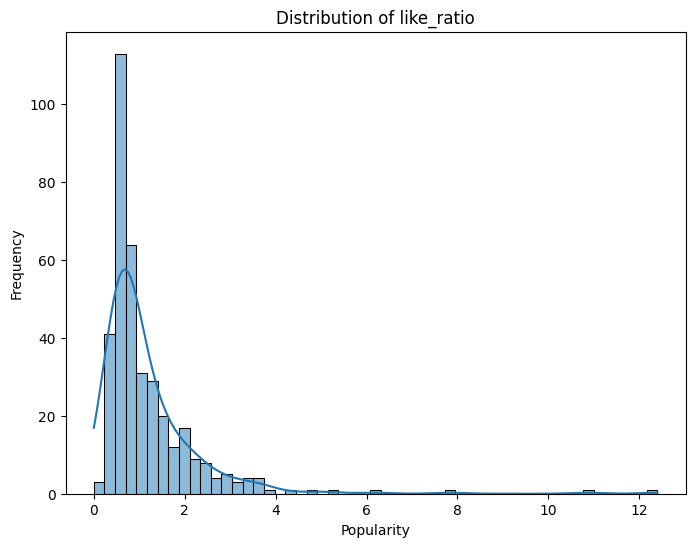

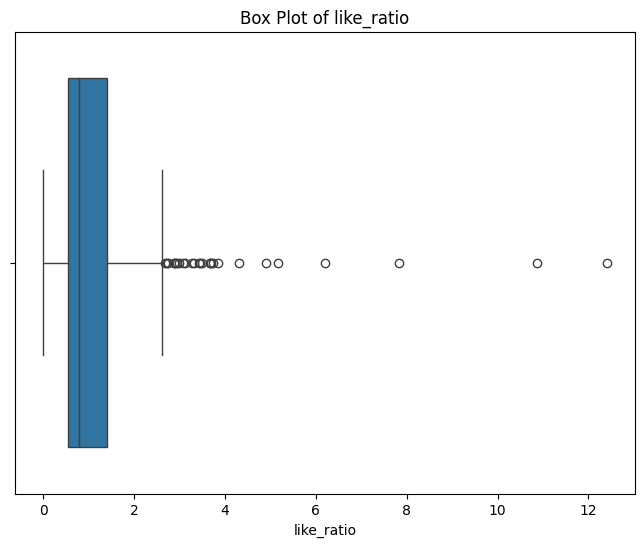

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# histplot build
plt.figure(figsize=(8, 6))
sns.histplot(df['like_ratio'], kde=True)
plt.title('Distribution of like_ratio')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

# boxplot build
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['like_ratio'])
plt.title('Box Plot of like_ratio')
plt.xlabel('like_ratio')
plt.show()

Songs are categorized into three categories based on like_ratio: Low, Medium and High Engagement levels

In [25]:
low_threshold = 0.7
high_threshold = 1.6
def classify_like_ratio(like_ratio):
    if like_ratio <= low_threshold:
        return 'Low'
    elif like_ratio <= high_threshold:
        return 'Medium'
    else:
        return 'High'


df['Like Ratio Category'] = df['like_ratio'].apply(classify_like_ratio)
# check like ratio category count
print(df['Like Ratio Category'].value_counts())

Like Ratio Category
Low       154
Medium    146
High       75
Name: count, dtype: int64


In [29]:
# Feature selection
# Specify the feature columns
features = [
    'Days Since Published', 'View Count', 'Like Count', 'Comment Count',
    'Subscriber Count', 'Mean Sentiment Score',
    'Duration_seconds', 'singer_followers', 'singer_popularity'
]
# Ensure there are no missing values in the dataset
df = df.dropna(subset=features + ['Like Ratio Category'])

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

X = df[features]
y = df['Like Ratio Category']

# Data set splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


# Initialize the Logistic Regression model (One-vs-Rest for multi-class)
model = LogisticRegression(multi_class='ovr', max_iter=1000, random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

X_scaled = scaler.fit_transform(X)  # Fit and transform the entire dataset

# Cross-validation to get a better estimate of the model performance
cross_val_scores = cross_val_score(model, X_scaled, y, cv=5)
print("\nCross-validation scores:", cross_val_scores)
print("\nMean cross-validation score:", cross_val_scores.mean())

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Cross-validation scores: [0.65333333 0.61333333 0.81333333 0.72       0.46666667]

Mean cross-validation score: 0.6533333333333333
Accuracy: 0.7733333333333333

Classification Report:
               precision    recall  f1-score   support

        High       0.64      0.82      0.72        11
         Low       0.86      0.86      0.86        35
      Medium       0.73      0.66      0.69        29

    accuracy                           0.77        75
   macro avg       0.74      0.78      0.76        75
weighted avg       0.78      0.77      0.77        75



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_lo

In [40]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

sampling_pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('decision_tree', DecisionTreeClassifier(random_state=42))
])

In [42]:
# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test_scaled)

# Evaluate the model
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nDecision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

# Cross-validation to get a better estimate of the model performance
cross_val_scores_dt = cross_val_score(dt_model, X_train_scaled, y_train, cv=5)
print("\nDecision Tree Cross-validation scores:", cross_val_scores_dt)
print("\nMean cross-validation score (Decision Tree):", cross_val_scores_dt.mean())

Decision Tree Accuracy: 0.6933333333333334

Decision Tree Classification Report:
               precision    recall  f1-score   support

        High       0.47      0.82      0.60        11
         Low       0.82      0.77      0.79        35
      Medium       0.70      0.55      0.62        29

    accuracy                           0.69        75
   macro avg       0.66      0.71      0.67        75
weighted avg       0.72      0.69      0.70        75


Decision Tree Cross-validation scores: [0.56666667 0.55       0.61666667 0.63333333 0.63333333]

Mean cross-validation score (Decision Tree): 0.6


The first decision tree model was trained using the default decision tree model with an accuracy of 69.3%. The model has higher recall but lower precision in the “High” category and poorer performance in the “Medium” category.

In [44]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

#param_grid
param_grid_refined = {
    'max_depth': [3,4,5],  
    'min_samples_split': [8,10,15],
    'min_samples_leaf': [3,4,5,6],   
    'criterion': ['entropy'],        
    'class_weight': ['balanced']  
}

grid_search_refined = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid_refined,
    cv=5,
    scoring='f1_macro', 
    n_jobs=-1
)

# train mode
grid_search_refined.fit(X_train_scaled, y_train)

print("Refined Best parameters:", grid_search_refined.best_params_)
print("Refined Best cross-validation score:", grid_search_refined.best_score_)

best_model_refined = DecisionTreeClassifier(
    **grid_search_refined.best_params_
)

best_model_refined.fit(X_train_scaled, y_train)

y_pred_refined = best_model_refined.predict(X_test_scaled)
print("\nRefined Test set accuracy:", accuracy_score(y_test, y_pred_refined))
print("\nRefined Classification Report:\n", classification_report(y_test, y_pred_refined))

Refined Best parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 8}
Refined Best cross-validation score: 0.6208158730661306

Refined Test set accuracy: 0.7466666666666667

Refined Classification Report:
               precision    recall  f1-score   support

        High       0.56      0.91      0.69        11
         Low       0.85      0.83      0.84        35
      Medium       0.74      0.59      0.65        29

    accuracy                           0.75        75
   macro avg       0.72      0.77      0.73        75
weighted avg       0.77      0.75      0.75        75



This decision tree model was hyper-parametrically optimized by GridSearchCV on the decision tree and the best parameters (e.g. max_depth=5 and min_samples_split=8) were obtained. The accuracy of the optimized model on the test set increased to 74.7%. The recall of the optimized model in the “High” category is significantly higher and the overall performance is improved.

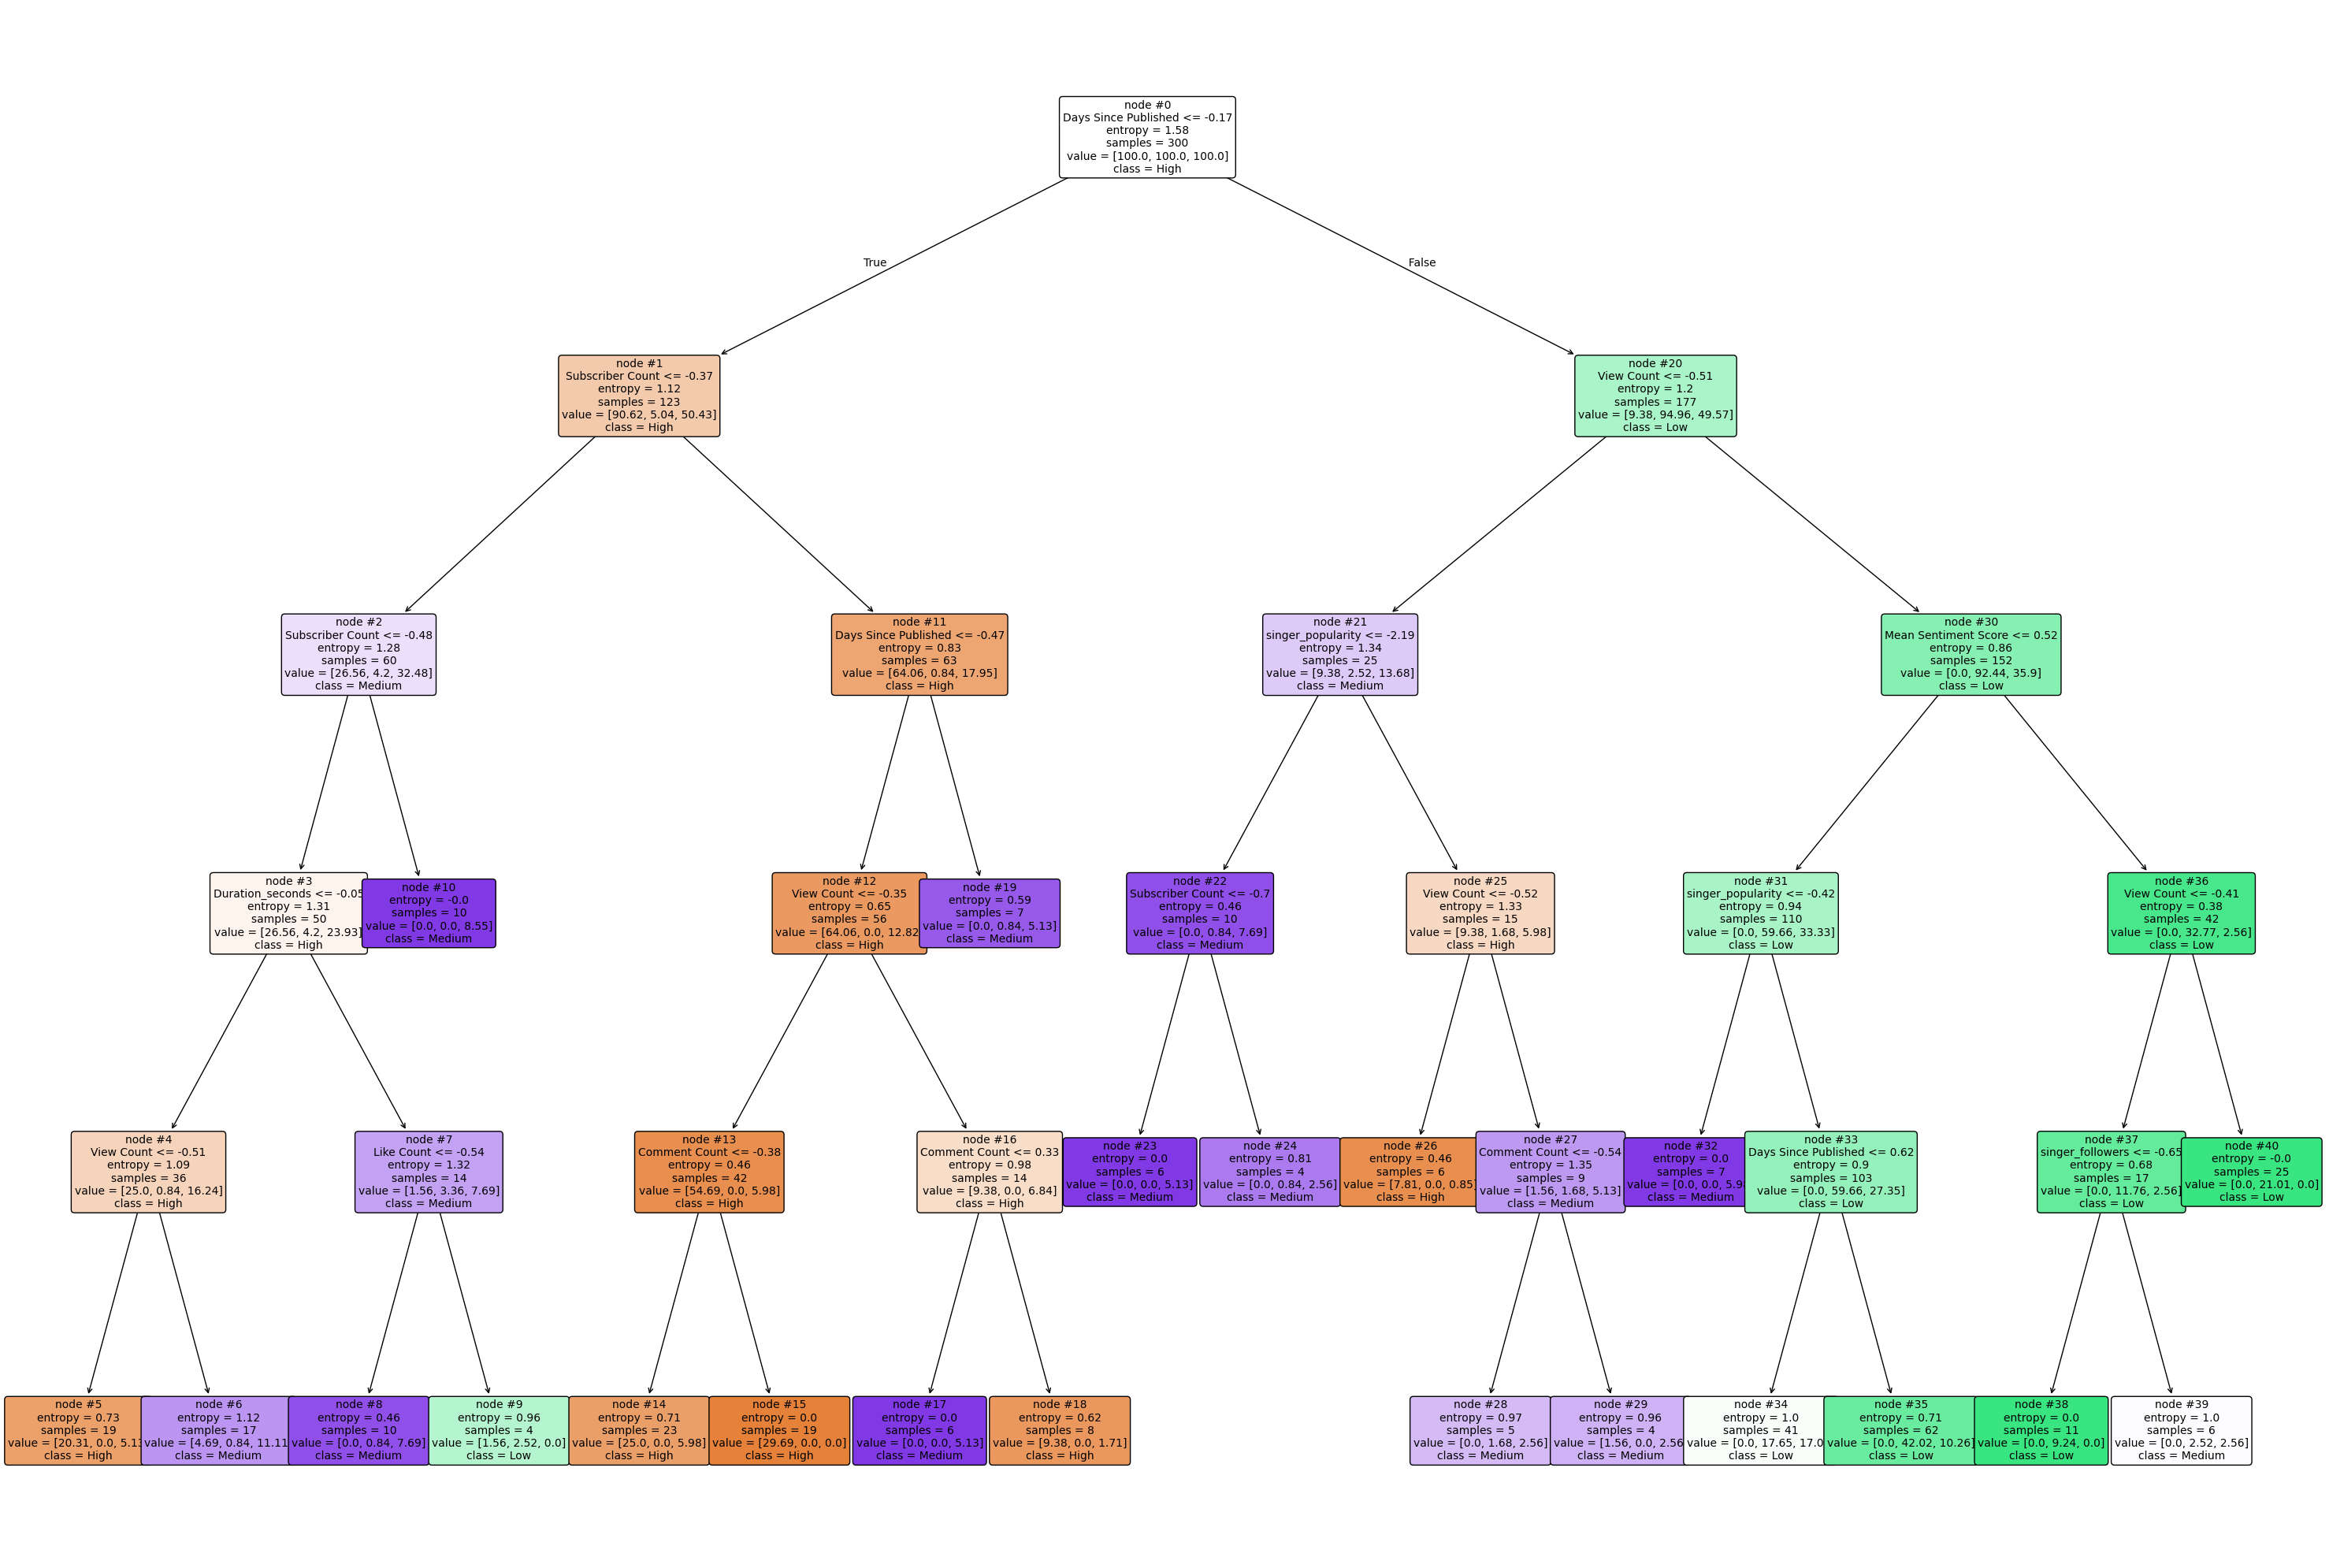

In [45]:
import matplotlib.pyplot as plt
from sklearn import tree

# Assuming 'best_model_refined' is your trained DecisionTreeClassifier model

# Set the size of the plot and DPI for higher resolution
plt.figure(figsize=(30, 20), dpi=100)

# Plot the decision tree with custom font size and node size
tree.plot_tree(
    best_model_refined,  # Here you can use your trained model
    feature_names=features,  # Replace 'features' with the list of feature names
    class_names=best_model_refined.classes_,  # Class names for your target
    filled=True,
    rounded=True,
    fontsize=10,  # Adjust font size here for better readability
    node_ids=True,
    proportion=False,
    precision=2
)

# Adjust the layout and make more space available
plt.tight_layout()

# Show the plot
plt.show()

In [47]:
#  random forest model
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Cross-validation to get a better estimate of the model performance
cross_val_scores_rf = cross_val_score(rf_model, X_train_scaled, y_train, cv=5)
print("\nRandom Forest Cross-validation scores:", cross_val_scores_rf)
print("\nMean cross-validation score (Random Forest):", cross_val_scores_rf.mean())


Random Forest Accuracy: 0.7866666666666666

Random Forest Classification Report:
               precision    recall  f1-score   support

        High       0.69      0.82      0.75        11
         Low       0.88      0.80      0.84        35
      Medium       0.73      0.76      0.75        29

    accuracy                           0.79        75
   macro avg       0.77      0.79      0.78        75
weighted avg       0.79      0.79      0.79        75


Random Forest Cross-validation scores: [0.75       0.68333333 0.68333333 0.7        0.78333333]

Mean cross-validation score (Random Forest): 0.72


Accuracy of this Random Forest model (0.79) is slightly higher than the 0.69 of the Decision Tree, showing its strength in classification tasks. Then it performs more balanced for different classes (High, Low, Medium), especially on Low class with high precision and recall (0.88 and 0.80 respectively). The precision is slightly lower for the High category, but still good. Finally it has an average cross-validation score of 0.70, which indicates a more stable, though not very high, performance of the model.